## 실습 : 유튜브에 있는 영상의 제목 및 링크 수집하기

#### 주의 : 밑에 있는 폴더 위치, 타겟의 URL은 원하는 옵션에 맞게 수정을 할 것

In [2]:
# ----------------------------------------------------------------------------- #
# 사용자의 환경마다 수정이 필요한 변수들

# 원하는 폴더의 위치
# 주의 : 컴푸터에서 폴더위치를 복사한 경우, \는 꼭 하나 더 추가해서 \\로 만들어 줄 것
# ex : "C:\\Users\\admin\\Documents\\ex"
folder_locate = "C:\\Users\\smhrd1\\Documents\\GitHub\\Crawling\\Study"

# 수집을 원하는 유튜버의 동영상목록 링크  
target_video_link = 'https://www.youtube.com/@ITSUB/videos'

# 조사할 영상의 최대 수 
max_video = 10

# 각 영상별 조사할 댓글의 최대 수
max_comment = 700

# ----------------------------------------------------------------------------- #

In [1]:
# 라이브러리 불러오기

while(True) :
    try :
        import os  # 운영체제 관련 작업 (폴더 생성, 삭제 등)
        break
    except ModuleNotFoundError:
        !pip install --break-system-packages  os
    
while(True) :
    try :
        # 페이지 로딩 시간을 부여하는 라이브러리
        import time  # 시간 관련 기능 (대기, 지연)
        break
    except ModuleNotFoundError:
        !pip install --break-system-packages  time 
    
while(True) :
    try:
        # 컴퓨터용 브라우저
        # 컴퓨터용 키보드
        # 선택지 지정방식
        from selenium import webdriver as wb
        from selenium.webdriver.common.keys import Keys
        from selenium.webdriver.common.by import By 
        from selenium.webdriver.chrome.service import Service
        from selenium.webdriver.chrome.options import Options
        break
    except ModuleNotFoundError:
        !pip install --break-system-packages  selenium

while(True) :
    try :
        # 랭과 열로 이루어진 표와 같은 형태를 다룰 수 있는 라이브러리
        import pandas as pd 
        break
    except ModuleNotFoundError :
        !pip install --break-system-packages  pandas
while(True) :
    try : 
        from collections import Counter 
        break
    except :
        !pip install --break-system-packages  collections 
        
while(True) :
    try : 
        from konlpy.tag import Okt 
        break
    except :
        !pip install --break-system-packages  konlpy 
        
while(True) :
    try : 
        import re
        break
    except :
        !pip install --break-system-packages  re 

while(True) :
    try :
        from wordcloud import WordCloud
        break
    except :
        !pip install --break-system-packages  wordcloud

while(True) :
    try :
        import matplotlib.pyplot as plt 
        import matplotlib
        matplotlib.rc('font', family='Malgun Gothic')
        break
    except :
        !pip install --break-system-packages  matplotlib  

while(True) :
    try :
        from PIL import Image
        break
    except :
        !pip install --break-system-packages  wordcloud 

while(True) :
    try :
        import platform
        break
    except :
        !pip install --break-system-packages  platform 
        
print(f'필요한 라이브러리 import 완료')

필요한 라이브러리 import 완료


In [3]:
# 전체적으로 관리할 변수를 관리

# 조사할 동영상의 수
MAX_VIDEO_LEN = max_video
# 조사할 각 영상별 댓글의 수
MAX_COMMENT_LEN = max_comment

# 파일을 저장할 폴더의 위치  
ORIGIN_URL = folder_locate
# 파일을 저장할 폴더를 이름
FOLDER_NAME = 'youtube_list'

# 내가 수집하는 유튜브의 동영상 링크 
YOUTUBE_URL = target_video_link

# 내가 수집하는 유투브의 이름(자동으로 처리)
YOUTUBER_NAME = YOUTUBE_URL.split('@')[-1].split('/')[0]

# 수집하려는 영상 제목의 ID값
VIDEO_TITLE_ID = 'video-title-link'
# 수집하려는 영상 링크의 ID값
VIDEO_URL_ID = 'video-title-link'

# 수집하려는 영상의 댓글 CLASS값
COMMENT_CLASS = 'yt-attributed-string.style-scope.ytd-comment-view-model > span.yt-core-attributed-string.yt-core-attributed-string--white-space-pre-wrap'

# 유튜브에서 동영상 탭의 버튼 CLASS값
YOUTUBE_VIDEO_BUTTON = 'div.yt-tab-group-shape-wiz__tabs yt-tab-shape:nth-child(2)' 

# 유튜브의 일시정지 버튼 CLASS 값
VIDEO_STOP_BUTTON = 'button.ytp-play-button.ytp-button'

# csv로 저장하려는 파일의 이름
FILE_NAME = f'{YOUTUBER_NAME}' + '_youtube_video_list'

# 최종적으로 가지고 있을 유튜브의 정보들
# 영상의 이름들을 보관할 리스트
get_all_title = []
# 영상의 링크들을 보관할 리스트
get_all_url = []
# 각 영상별 댓글을 보관할 리스트
get_all_comment = []

# 동영상별 댓글을 저장할 딕셔너리 
split_comments_dict = {}

# 영상별 정제된 댓글 DataFrame 저장 딕셔너리
cleaned_comment_df = {}

# 각 영상별로 댓글을 관리할 리스트
comment_df = {}

# 웹 브라우저를 가지고 있을 변수
driver = None

In [4]:
# 워드클라우드에서 불필요한 단어 리스트들을 모아둔 것
stopwords = [
    "그", "또", "제발", "있지", "아니", "약간", "매우", "것이", "단", "있습니다", "그런",
    "너무", "더", "큰", "이외에", "그리고", "그러나", "때문에", "따라서", "하지만", "즉",
    "그렇지만", "그래서", "이런", "저런", "이렇게", "저렇게", "어떤", "모든", "각", "모두",
    "일부", "아주", "정말", "확실히", "대부분", "대체로", "사실", "기본적으로", "일반적으로",
    "심지어", "오히려", "약", "대략", "거의", "이미", "결국", "그대로", "별로", "무엇",
    "어느", "어느정도", "이상", "이하", "여러", "상당히", "상당수", "예를들면", "예를들어",
    "같은", "등", "마찬가지", "굉장히", "굳이", "실제로", "가장", "최대한", "대체", "심각하게",
    "전혀", "도대체", "결코", "엄청", "아예", "하필", "어쩐지", "차라리", "그나마", "대략적으로",
    "실질적으로", "이상하게", "특별히", "한마디로", "솔직히", "명확히", "구체적으로", "전체적으로",
    "본격적으로", "일정부분", "간혹", "간단히", "그냥", "결과적으로", "심하게", "어이없게", "일부러",
    "확인해보니", "보니까", "사실은", "그렇다면", "한편", "이와같이", "비슷하게", "다르게", "역시",
    "기왕이면", "하긴", "그렇구나", "그럴듯하게", "이처럼", "앞으로", "뒤로", "왠지", "대충", "적당히",
    "필요없이", "아무리", "어쩌면", "결과론적으로", "최소한", "막연하게", "이유없이", "의외로", "마치",
    "더군다나", "심지어도", "게다가", "게다가도", "특히", "비로소", "겨우", "굳이말하자면", "예컨대",
    "아무튼", "하여간", "일단", "마지막으로", "분명히", "확실하게", "솔직하게", "대략적", "구체적",
    "대체적으로", "일반적", "개인적", "사회적", "사실적으로", "극단적으로", "어떻게든", "그래도",
    "그러고보니", "그렇지", "마땅히", "어쩔수없이", "안타깝게도", "우연히", "고의로", "명백히", "분명하게",
    "완전히", "제대로", "대충대충", "말하자면", "비유하자면", "쉽게말해", "한마디로말해", "결론적으로",
    "논리적으로", "체계적으로", "일목요연하게", "논리적", "비논리적", "비합리적", "상식적으로", "일반적으로",
    "보편적으로", "주관적으로", "객관적으로", "대비적으로", "정신적으로", "육체적으로", "과학적으로",
    "통계적으로", "이론적으로", "실용적으로", "결정적으로", "기본적으로", "실제적으로", "자연스럽게",
    "강제적으로", "비자연스럽게", "미친듯이", "완벽하게", "불완전하게", "다소", "조금", "많이", "적게",
    "어떻게", "왜", "무엇을", "무엇이", "어떤식으로", "어디서", "언제", "어떻다", "어떻게든", "이해할수없다",
    "이해하기어렵다", "이해가안된다", "모르겠다", "모를수도있다", "알수없다", "알기어렵다", "정확하지않다",
    "확실하지않다", "의심스럽다", "애매하다", "어색하다", "혼란스럽다", "답답하다", "모호하다", "불확실하다",
    "이상하다", "이해불가", "의미없다", "필요없다", "쓸데없다", "무의미하다", "도움되지않다", "도움이안된다",
    "불필요하다", "무가치하다", "하찮다", "쓸모없다", "별로필요없다", "대수롭지않다", "별로중요하지않다",
    "크게중요하지않다", "전혀중요하지않다", "아무소용없다", "소용없다", "해결되지않는다", "효과없다",
    "무력하다", "능력이없다", "할수없다", "할줄모른다", "하기어렵다", "어려운", "쉬운", "어렵지않은",
    "불가능하다", "가능하지않다", "현실적으로불가능하다", "이론적으로불가능하다", "현실성이없다",
    "실현불가능하다", "좀", "너", "한", "하려고", "마침", "기준", "대", "저저저", "답글", "이제",
    "이정도", "위해", "했는데", "했다", "진짜", "보고", "같네요", "같음", "같다"
]



In [5]:
# 크롬을 시작하고, 사이트에 접속할 함수
def click_the_video_list_button() :
    try :
        # YOUTUBE_VIDEO_BUTTON 
        video_list_button = find_element_CLASS(YOUTUBE_VIDEO_BUTTON)
        video_list_button.click()  
        return True
    except :
        return False 
        
def click_the_video_list(): 
    infinite_loop_fix = 0
    print(f'페이지 로딩중... ')
    
    while True:
        click_check = click_the_video_list_button()  
        if click_check :  # 클릭이 성공하면 반복 종료
            break
        else:
            if infinite_loop_fix % 5 == 0: 
                print(f'{infinite_loop_fix // 5}초')
            time.sleep(0.2)
            infinite_loop_fix += 1 
        if infinite_loop_fix == 50:  # 최대 50회까지 반복
            break
    
def web_start() :
    global driver
     
    # 크롬 드라이버 실행
    driver = wb.Chrome()
    
    driver.get(YOUTUBE_URL) 
    click_the_video_list()  

In [6]:
# input값(ID)를 통해 모든 elements를 수집하는 함수
def find_elements_ID(input) : 
    try :
        fint_result = driver.find_elements(By.ID, input)
        return fint_result
    except :
        return 0 
        
def find_elements_CLASS(input) : 
    try :
        fint_result = driver.find_elements(By.CSS_SELECTOR, input)
        return fint_result
    except :
        return 0 

def find_element_CLASS(input) : 
    try :
        fint_result = driver.find_element(By.CSS_SELECTOR, input)
        return fint_result
    except :
        return 0 

In [7]:
# 공통 스크롤 함수
def scroll_page():
    body = driver.find_element(By.TAG_NAME, 'body')  # 페이지의 바디를 찾기
    body.send_keys(Keys.END)  # 바디에서 스크롤을 위한 'END'버튼 클릭
    time.sleep(1.5)  # 페이지 로딩을 위한 1초 로딩

# 페이지를 비디오 수에 맞춰서 스크롤하는 함수
def page_video_Scroll():
    global MAX_VIDEO_LEN
    while(True):
        origin_title = len(find_elements_ID(VIDEO_TITLE_ID))  # 페이지 검사를 위한 사전 타이틀 수 파악

        if(origin_title >= MAX_VIDEO_LEN):
            print(f'{MAX_VIDEO_LEN}개의 영상을 찾았습니다. ')
            break
            
        scroll_page()  # 페이지 스크롤
        try :
            later_title = len(find_elements_ID(VIDEO_TITLE_ID))  # 페이지 검사를 위한 타이틀 수 파악
        except :
            later_title = origin_title
        
        if(later_title >= MAX_VIDEO_LEN):
            print(f'{MAX_VIDEO_LEN}개의 영상을 찾았습니다. ')
            break
            
        elif(origin_title == later_title): 
            print("페이지의 끝인지 검사중...")
            scroll_page()  # 페이지 스크롤
            time.sleep(2)
            try :
                check_title = len(find_elements_ID(VIDEO_TITLE_ID))  # 페이지 검사를 위한 타이틀 수 파악
            except :
                check_title = later_title
                
            if (check_title == later_title): 
                print(f'페이지가 끝났습니다. 최종 영상의 수 : ', check_title)
                break
            else:
                print("페이지가 아직 끝나지 않아 스크롤을 다시 시작합니다. 현재 영상의 수 : ", check_title) 

# 페이지에서 댓글 수를 파악해 가며 스크롤을 내리는 함수
def comment_Scroll():
    global MAX_COMMENT_LEN
    while(True):
        origin_comment = len(find_elements_CLASS(COMMENT_CLASS))  # 페이지 검사를 위한 사전 댓글 수 파악
       
        if(origin_comment >= MAX_COMMENT_LEN + 1):
            print(f'{MAX_COMMENT_LEN}개의 댓글을 찾았습니다. ')
            break

        time.sleep(1.5)
        
        scroll_page()  # 페이지 스크롤
        try :
            later_comment = len(find_elements_CLASS(COMMENT_CLASS))   # 페이지 검사를 위한 댓글 수 파악
        except :
            later_comment = origin_comment
        
        if(later_comment >= MAX_COMMENT_LEN + 1):
            print(f'{MAX_COMMENT_LEN}개의 댓글을 찾았습니다. ')
            break
            
        elif(origin_comment == later_comment) :
            print("페이지의 끝인지 검사중...")
            
            scroll_page()  # 페이지 스크롤
            time.sleep(1)
            scroll_page()  # 페이지 스크롤
            time.sleep(4)
            try :
                check_comment = len(find_elements_CLASS(COMMENT_CLASS))  # 페이지 검사를 위한 댓글 수 파악
            except :
                check_comment = later_comment
            
            if (check_comment == later_comment) :  
                print(f'페이지가 끝났습니다. 최종 댓글의 수 : ', check_comment - 2)
                break
            else:
                print("페이지가 아직 끝나지 않아 스크롤을 다시 시작합니다. 현재 댓글의 수 : ", check_comment - 1) 


In [8]:
# 모든 타이틀을 수집하는 함수
def get_All_Title() :  
    temp_list = find_elements_ID(VIDEO_TITLE_ID) 
    temp_get_all_title = [i.text for i in temp_list]
    
    # MAX_VIDEO_LEN개 까지만 수집하거나 더 이상 데이터가 없을 때까지 수집
    for i in temp_get_all_title:
        if len(get_all_title) >= MAX_VIDEO_LEN:
            break
        get_all_title.append(i)
    
    print(f'{len(get_all_title)}개의 제목 데이터를 수집 완료')

In [9]:
# 모든 링크를 수집하는 함수
def get_All_Url() :
    temp_list = find_elements_ID(VIDEO_URL_ID) 
    temp_get_all_url = [element.get_attribute("href") for element in temp_list]
    
    # MAX_VIDEO_LEN개 까지만 수집하거나 더 이상 데이터가 없을 때까지 수집
    for i in temp_get_all_url:
        if len(get_all_url) >= MAX_VIDEO_LEN:
            break
        get_all_url.append(i)
    
    print(f'{len(get_all_url)}개의 제목 링크 데이터를 수집 완료')


In [10]:
# 현재 페이지에 있는 댓글을 수집하는 함수
def get_All_Comment():
    temp = []
    temp_get_all_comment = find_elements_CLASS(COMMENT_CLASS)  # 페이지 검사를 위한 사전 댓글 수 파악
    
    for idx, i in enumerate(temp_get_all_comment):
        if len(temp) >= MAX_COMMENT_LEN + 1:
            break
        if idx == 0:  # 첫 번째 댓글은 건너뜀
            continue
        temp.append(str(i.text))  # 첫 번째 댓글을 제외한 나머지 댓글을 추가
     
    get_all_comment.append(temp)  
    print(f'{len(temp) - 1}개의 댓글 데이터를 수집 완료')


In [11]:
# 폴더를 생성하고 이동하는 함수
def make_folder() :
    try :
        os.chdir(ORIGIN_URL)
        print(f'{ORIGIN_URL}로 이동 성공')
    except : 
        print(f'{ORIGIN_URL}로 이동 실패')
        return False
        
    try : 
        os.mkdir(FOLDER_NAME)
        print(f'{FOLDER_NAME} 폴더를 생성했씁니다.')
    except :
        print(f'{FOLDER_NAME} 폴더가 이미 있습니다.')

    # 생성했거나, 이미 있는 폴더로 이동
    os.chdir(FOLDER_NAME)
    
    return True

# csv 파일로 저장하는 함수
def make_csv():
    global get_all_title, get_all_url, get_all_comment 
    make_folder_check = make_folder()
    if not make_folder_check:
        print(f'폴더 이동에 실패하여 지금 위치에 파일을 생성합니다. ')
    
    # get_all_comment의 길이를 get_all_title과 get_all_url에 맞추기
    max_len = max(len(get_all_title), len(get_all_url))
    
    # 부족한 길이를 None으로 채우기
    get_all_comment = get_all_comment[:max_len]  # 만약 get_all_comment가 너무 길면 자르기
    get_all_comment.extend([None] * (max_len - len(get_all_comment)))  # 부족한 부분을 None으로 채우기
    
    pd.set_option('display.max_colwidth', None)
    
    # DataFrame 생성
    df = pd.DataFrame({'제목': get_all_title, '링크': get_all_url, '댓글': get_all_comment})
    df.index = df.index + 1  
    
    # 파일 이름 생성
    file_index = 0
    new_file_name = None
    while(True):
        new_file_name = f"{FILE_NAME}_{file_index:04}.csv" 
        
        # 파일 이름 중복 확인
        name_check = os.path.isfile(new_file_name)
        if name_check:
            # 동일명의 파일이 있다면
            file_index += 1
        else:
            # 파일이 없다면
            break
    
    try:
        # CSV 파일로 저장
        df.to_csv(new_file_name, encoding='utf-8') 
        print(f'{new_file_name} 파일을 성공적으로 생성했습니다.')
    except:
        print(f'{new_file_name} 파일 생성 실패...')


In [12]:
# 동영상을 일시정지하는 함수
def stop_the_video() :
    wait_count = 0;
    while(True) :
        try : 
            stop_button = find_element_CLASS(VIDEO_STOP_BUTTON)
            stop_button.click()
            break
        except : 
            print(f'아직 페이지가 로딩되지 않음.')
            time.sleep(0.1)  
            wait_count = wait_count + 1
            if(wait_count == 100) :
                # 100번동안 일시정지를 찾을 수 없었다면 (= 10초동안 동영상이 로딩되지 않은 경우)
                # 무한루프를 해결하기 위해 break
                print(f'{wait_count}회 동안 동영상 정지 버튼을 찾을 수 없어서 해당 과정은 패스합니다.')
                break
    time.sleep(0.5)

In [13]:
# 특절 페이지로 접속하여 댓글을 수집하는 함수
def get_comment_in_url() : 
    for i in get_all_url : 
        driver.get(i)  
        stop_the_video()
        comment_Scroll()
        get_All_Comment()
        

In [14]:
# 브라우저를 닫는 함수
def web_close() :
    driver.close() 
    print(f'시스템이 종료되었습니다.')

In [15]:
def comment_preprocessing() : 
    global split_comments_dict 
    
    # 각 동영상 댓글을 공백 기준으로 쪼개기
    for i in range(len(get_all_comment)): 
        split_comments_dict[i] = [comment.split() for comment in get_all_comment[i]]  # 공백을 기준으로 쪼개기
     
    
    # 각 영상별로 댓글을 관리할 리스트
    global comment_df
    
    for i in range(len(get_all_comment)): 
        comment_df[i] = pd.DataFrame({'내용': [' '.join(comment) for comment in split_comments_dict[i]]})
        comment_df[i].index = comment_df[i].index + 1  # 인덱스 1부터 시작
    
    # 0번 영상의 댓글 DataFrame 확인
    comment_df[0]

In [16]:
def clean_text(text) :
    text = re.sub(r'[^가-힣\s]', '', text)  # 특수기호 제거 (한글과 공백만 남김)
    words = text.split()  # 단어 분리
    words = [word for word in words if word not in stopwords]  # 불필요한 단어 제거
    return " ".join(words)

In [17]:
# 영상별 정제된 댓글 DataFrame 저장 딕셔너리
def cleaned_comment() :
    global cleaned_comment_df
    
    for i in comment_df.keys():
        df = comment_df[i].copy()
        df['정제_내용'] = df['내용'].apply(clean_text)
        cleaned_comment_df[i] = df
    
    # 예시: 0번 영상 정제된 댓글 확인
    cleaned_comment_df[0].head()


In [18]:
def meke_the_wordcloud() :
    # OS별 폰트 경로 설정
    if platform.system() == "Windows":
        font_path = "C:\\Windows\\Fonts\\malgun.ttf"
    else:
        font_path = "/System/Library/Fonts/Supplemental/AppleGothic.ttf"  # Mac용 폰트
    
    for i in range(len(cleaned_comment_df)):
        text = ' '.join(cleaned_comment_df[i]['정제_내용'])
    
        # 데이터가 없으면 건너뛰기
        if not text.strip():
            continue
        
        # 고해상도 워드클라우드 생성
        wordcloud = WordCloud(
            width=3200,  # 해상도 증가
            height=1600, # 해상도 증가
            background_color='white',
            font_path=font_path,  # OS별 폰트 적용
            colormap='spring',
            max_font_size=400,  # 최대 글자 크기 증가
            min_font_size=20,   # 최소 글자 크기 증가
            font_step=2,
            margin=10,
        ).generate(text)
        
        # 워드클라우드 표시
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')  # 축 제거
        
        # 안전한 파일명 생성
        raw_filename = f"{YOUTUBER_NAME}_{get_all_title[i]}_워드_클라우드.jpg"
        safe_filename = re.sub(r'[^\w\-_\. ]', '_', raw_filename)[:100]  # 파일명에서 불가능한 문자 제거 및 길이 제한
        
        # 고해상도로 저장
        try :
            plt.savefig(safe_filename, dpi=1200)
        except :
            print(f'{safe_filename}의 생성을 실패했습니다. ')
        
        # 워드클라우드 화면에 표시
        plt.show()

In [19]:
# 유튜브 채넣에서 댓글 수집하고, csv 파일로 저장하는 부분
web_start()
page_video_Scroll()
get_All_Title()
get_All_Url()
get_comment_in_url()
web_close()
make_csv() 
 

페이지 로딩중... 
10개의 영상을 찾았습니다. 
10개의 제목 데이터를 수집 완료
10개의 제목 링크 데이터를 수집 완료
페이지의 끝인지 검사중...
페이지가 끝났습니다. 최종 댓글의 수 :  585
585개의 댓글 데이터를 수집 완료
700개의 댓글을 찾았습니다. 
700개의 댓글 데이터를 수집 완료
페이지의 끝인지 검사중...
페이지가 아직 끝나지 않아 스크롤을 다시 시작합니다. 현재 댓글의 수 :  359
700개의 댓글을 찾았습니다. 
700개의 댓글 데이터를 수집 완료
700개의 댓글을 찾았습니다. 
700개의 댓글 데이터를 수집 완료
페이지의 끝인지 검사중...
페이지가 끝났습니다. 최종 댓글의 수 :  378
378개의 댓글 데이터를 수집 완료
700개의 댓글을 찾았습니다. 
700개의 댓글 데이터를 수집 완료
700개의 댓글을 찾았습니다. 
700개의 댓글 데이터를 수집 완료
페이지의 끝인지 검사중...
페이지가 끝났습니다. 최종 댓글의 수 :  455
455개의 댓글 데이터를 수집 완료
페이지의 끝인지 검사중...
페이지가 끝났습니다. 최종 댓글의 수 :  341
341개의 댓글 데이터를 수집 완료
페이지의 끝인지 검사중...
페이지가 끝났습니다. 최종 댓글의 수 :  333
333개의 댓글 데이터를 수집 완료
시스템이 종료되었습니다.
C:\Users\smhrd1\Documents\GitHub\Crawling\Study로 이동 성공
youtube_list 폴더가 이미 있습니다.
ITSUB_youtube_video_list_0003.csv 파일을 성공적으로 생성했습니다.


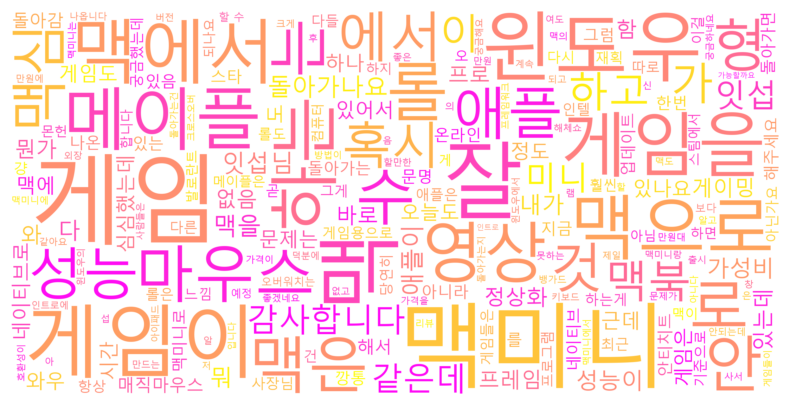

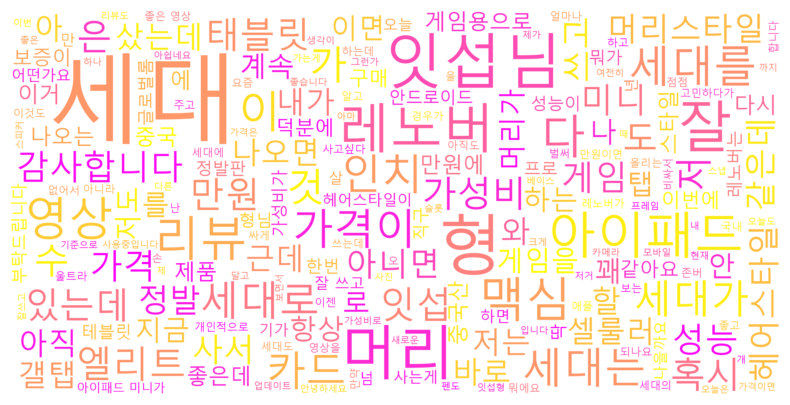

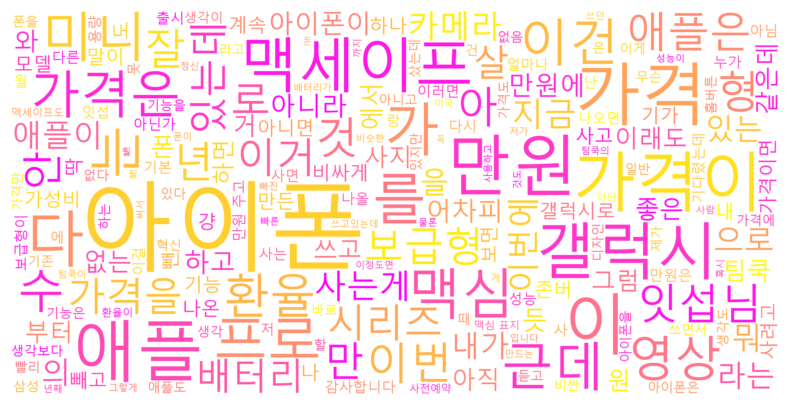

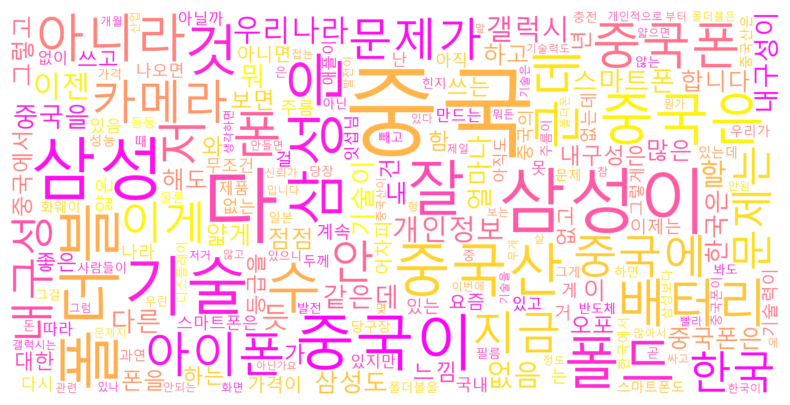

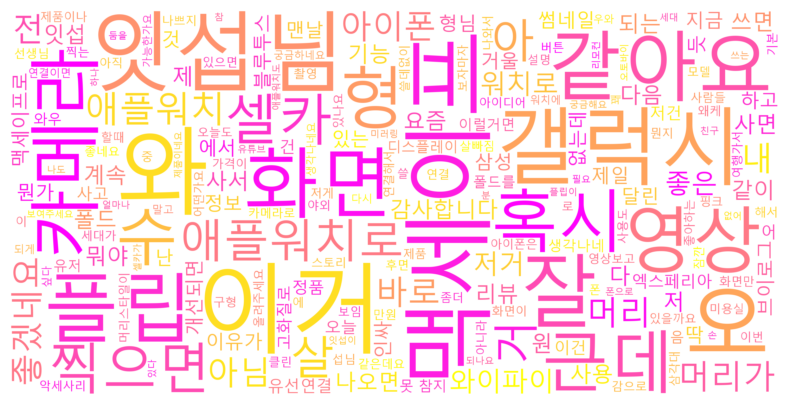

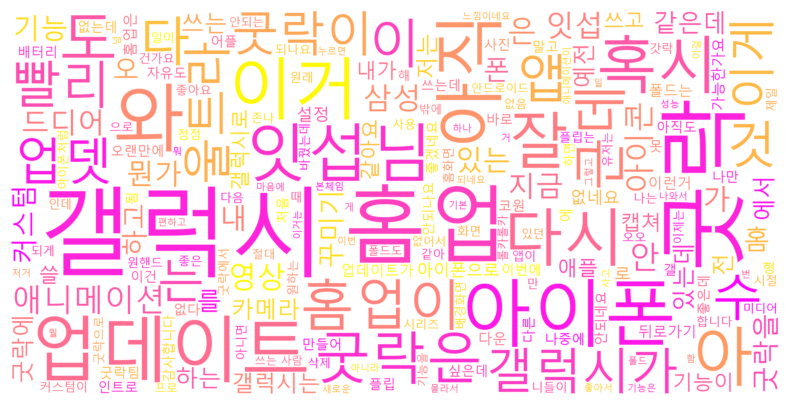

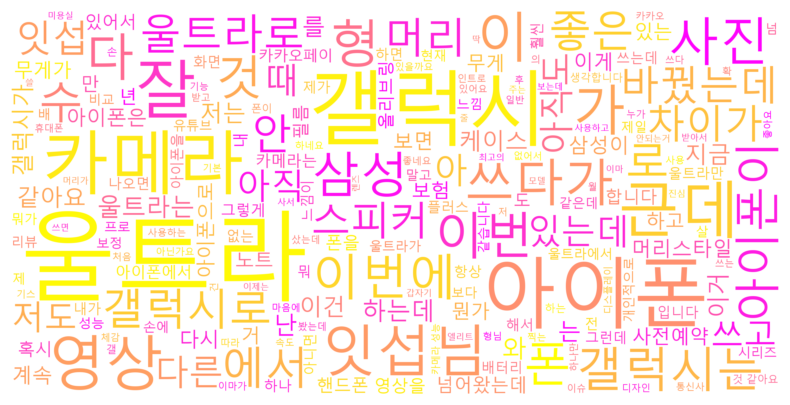

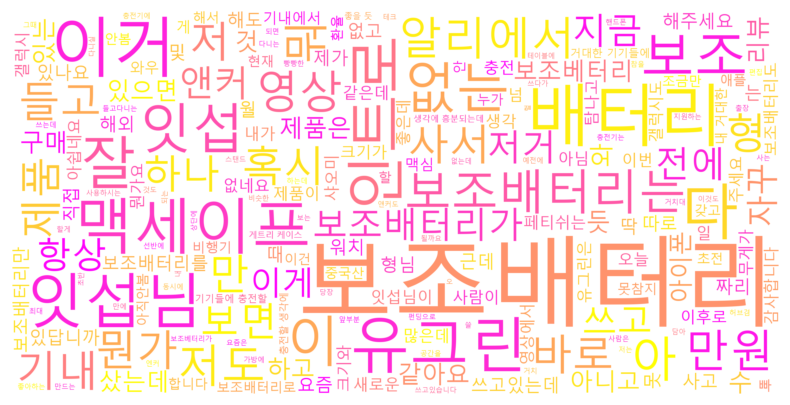

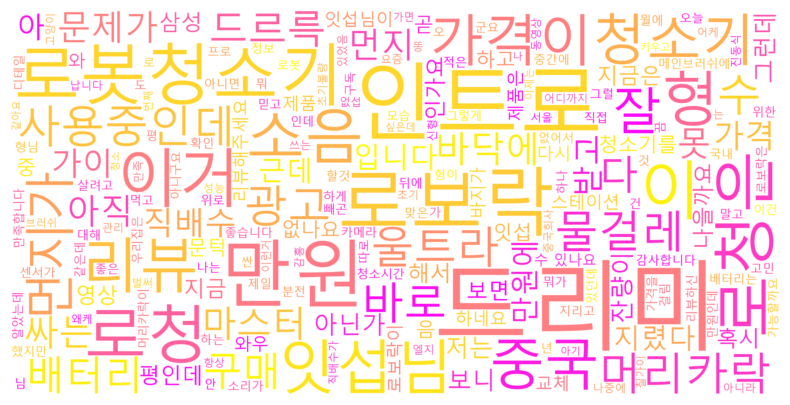

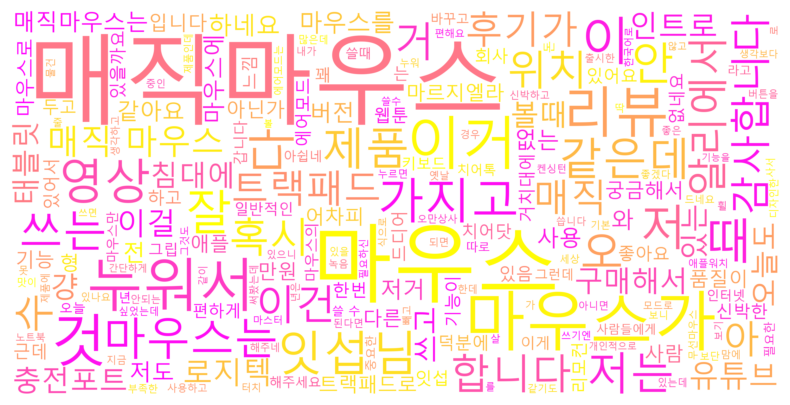

In [20]:
# 워드클라우드를 만드는 과정
comment_preprocessing()
cleaned_comment()
meke_the_wordcloud()